In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#  Loading Data

path = "/content/drive/MyDrive/DataSource/heatingOilTrainingset.csv"

load_data = pd.read_csv(path)

In [4]:
# Membuat data frame

df=pd.DataFrame(load_data)
df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


# Bussines understanding
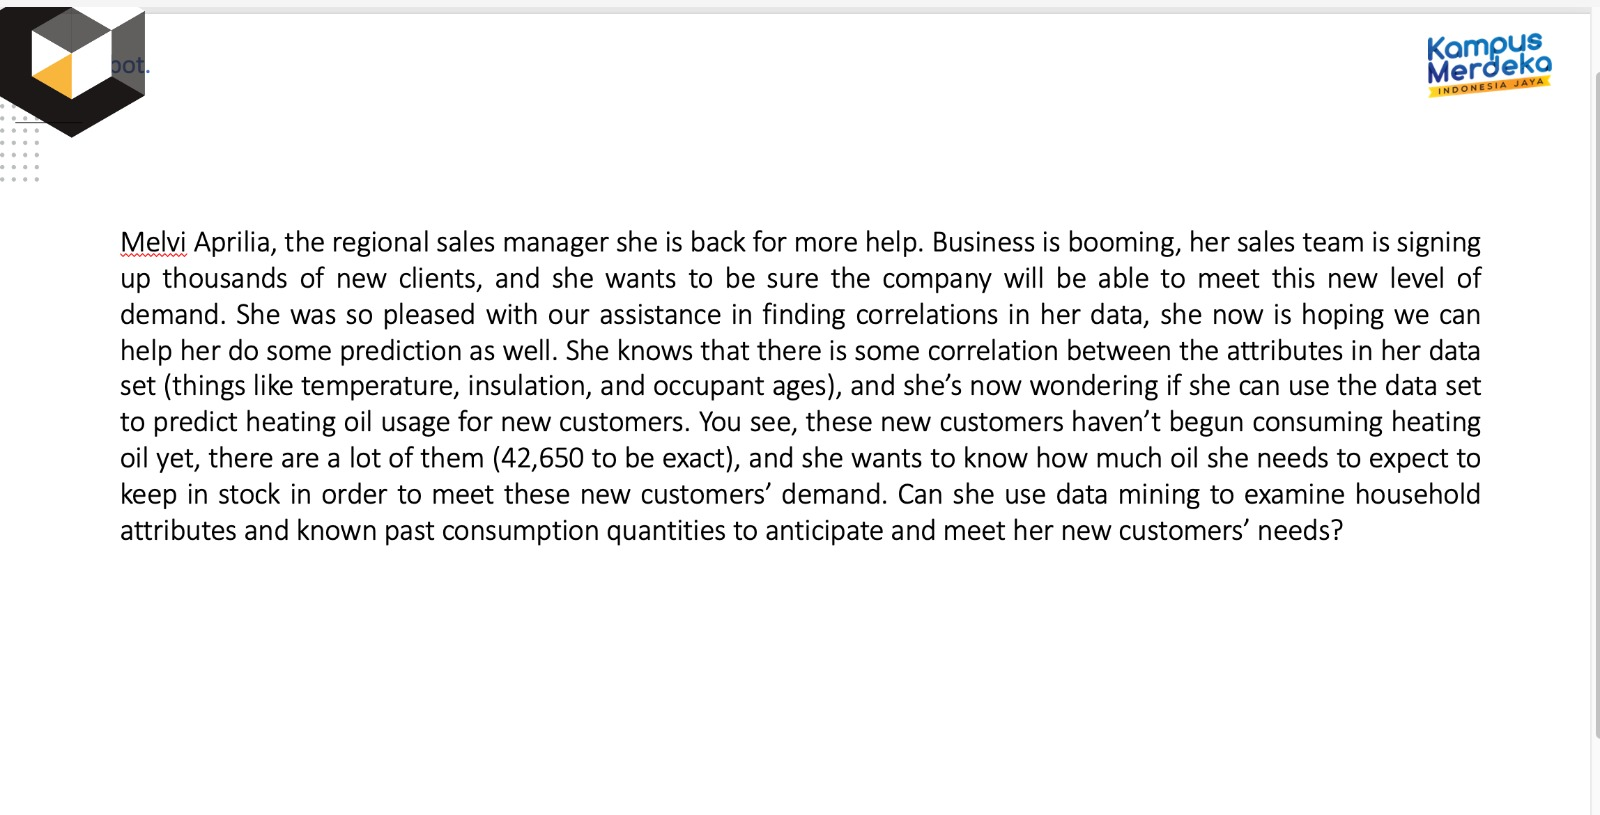

- Judul : Penerapan Machine learning untuk mengamankan stok level heating oil menggunakan pendekatan analisa prediktif
- Jenis : Supervised Learning
- Data Training: Histori penjualan heating dengan rekap survei pelanggan
- Algoritma : Linear Regression, MLP Regressor (artificial Neural Network)


# Data Understanding
As a review, our data set from Chapter 4 contains the following attributes:
- Insulation: This is a density rating, ranging from one to ten, indicating the thickness of
each home’s insulation. A home with a density rating of one is poorly insulated, while a
home with a density of ten has excellent insulation.
- Temperature: This is the average outdoor ambient temperature at each home for the
most recent year, measure in degree Fahrenheit.
- Heating_Oil: This is the total number of units of heating oil purchased by the owner of
each home in the most recent year.
- Num_Occupants: This is the total number of occupants living in each home.
- Avg_Age: This is the average age of those occupants.
- Home_Size: This is a rating, on a scale of one to eight, of the home’s overall size. The
higher the number, the larger the home

Sebagai tinjauan, kumpulan data kami dari Bab 4 berisi atribut berikut:
- Isolasi: Ini adalah peringkat kepadatan, mulai dari satu hingga sepuluh, yang menunjukkan ketebalan
isolasi setiap rumah. Rumah dengan tingkat kepadatan satu memiliki insulasi yang buruk, sedangkan a
rumah dengan kepadatan sepuluh memiliki isolasi yang sangat baik.
- Suhu: Ini adalah suhu rata-rata lingkungan luar ruangan di setiap rumah
tahun terakhir, ukur dalam derajat Fahrenheit.
- Heating_Oil: Ini adalah jumlah total unit minyak pemanas yang dibeli oleh pemilik
setiap rumah dalam satu tahun terakhir.
- Num_Occupants: Ini adalah jumlah total penghuni yang tinggal di setiap rumah.
- Avg_Age: Ini adalah usia rata-rata penghuni tersebut.
- Ukuran_Rumah: Ini adalah peringkat, dalam skala satu hingga delapan, dari ukuran rumah secara keseluruhan. Itu
semakin tinggi angkanya, semakin besar rumahnya

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


In [6]:
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

###  Syarat estimasi semua data numerik
- tdk perlu konversi data ke numerik (kasus ini)
- tdk ada handling missing value

# Modeling: Linear Regression

- linear data harus continous

<Axes: title={'center': 'Pearson Corelation'}>

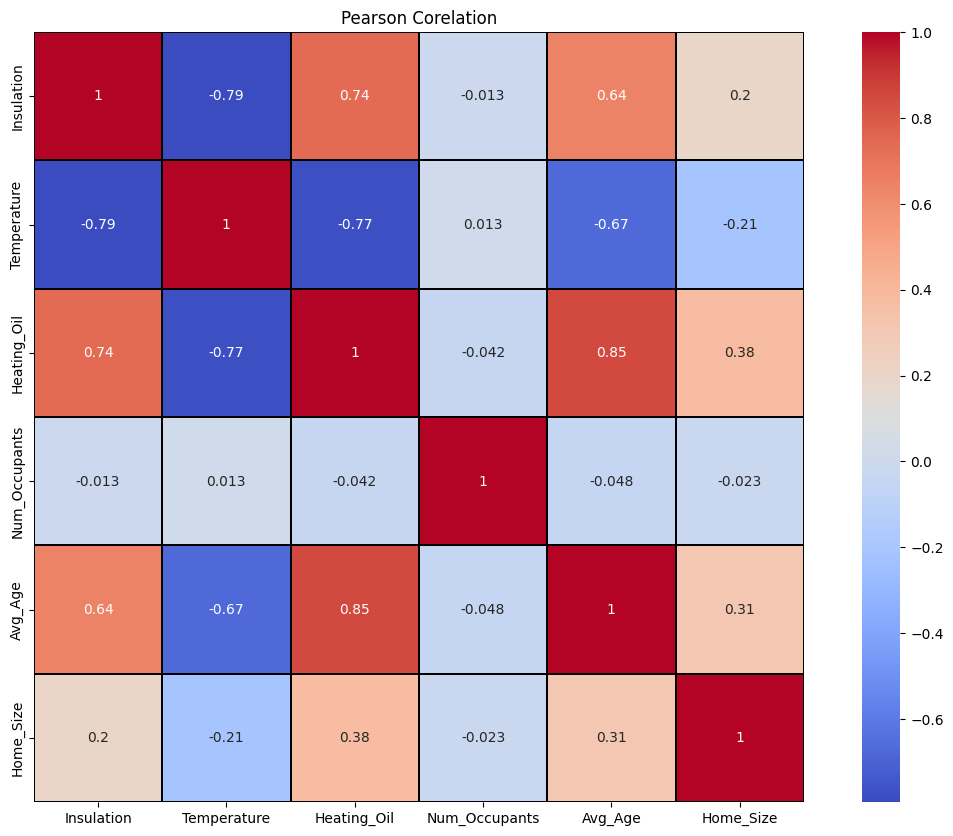

In [7]:
f,ax= plt.subplots(figsize=(15,10))
plt.title("Pearson Corelation")
sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap="coolwarm", linecolor='black', annot=True)

In [8]:
# Menentukan Input Variabel

x=df[['Insulation','Temperature','Num_Occupants','Avg_Age','Home_Size']]

# Menentukan Target Variabel

y=df['Heating_Oil']

In [9]:
# untuk split data kita menjadi training dan testing
from sklearn.model_selection import train_test_split
# untuk Linear model
from sklearn.linear_model import LinearRegression
# untuk evaluasi model
from sklearn import metrics

In [10]:
# Split: Training 70% & Testing 30%

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

### Linear Regression

In [11]:
reg_ln = LinearRegression()

In [12]:

# Train Model
model_ln=reg_ln.fit(
    x_train,
    y_train
)

In [13]:
# Memprediksi dengan data test
y_pred_reg=model_ln.predict(x_test)


In [14]:
# Evaluasi
print('r2_score : ', metrics.r2_score(y_test, y_pred_reg))

r2_score :  0.8113322126382521


In [15]:
# MAPE
def mean_mape(y_true, y_pred):
 y_true,y_pred= np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true-y_pred)/y_true))*100


In [16]:
print('MAPE: ', mean_mape(y_test, y_pred_reg))

MAPE:  7.845552048912459


### Hasil Model Linear Regression
Baik, karena
- nilai R2 0.81 mendekati 1.
- MAPE 7.8% tingkat eror dan kesuksesan 92.2%

# Modeling: MLP (ANN)

In [17]:
from sklearn.neural_network import MLPRegressor

In [18]:
# Object MLP
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(150,100,50),
    # learning_rate='adaptive',
    max_iter=200


                       )

In [19]:

# Train Model
model_mlp = mlp_reg.fit(
    x_train,
    y_train
)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
# Memprediksi dengan data test
y_pred_mlp = model_mlp.predict(x_test)

In [21]:
# Evaluasi
print('r2_score : ', metrics.r2_score(y_test, y_pred_mlp))

r2_score :  0.9040984678979523


In [22]:
# MAPE
def mean_mape(y_true, y_pred):
 y_true,y_pred= np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [23]:
print('MAPE: ', mean_mape(y_test, y_pred_mlp))

MAPE:  5.951502649707096


### Hasil Model MLP
- R2= 0.91 (Cukup baik)
- Mape = 6.8% tingkat eror dan kesuksesan 93.2% (Menambahkan 3 hidden layer)

# Implementasi Model ke data baru (implementasi ke machine learning)

Model yang akan digunakan adalah MLP regressor / ANN

In [24]:
#  Loading Data New Customer

path1 = "/content/drive/MyDrive/DataSource/heatingOilNewust.csv"

load_data1 = pd.read_csv(path1)

In [25]:
df1=pd.DataFrame(load_data1)
df1.head()

# Tidak ada field heating oil, karena data baru yg belum pernah melakukan pembelian

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7


## Data Preparation
1. Select Input Variabel
  -

In [26]:
# Menentukan Input Variabel

x1=df1[['Insulation','Temperature','Num_Occupants','Avg_Age','Home_Size']]


## Aplying Model


In [27]:
y_predic_mlp = model_mlp.predict(x1)
y_predic_mlp

array([271.94329856, 199.94050031, 219.19774074, ..., 119.61848855,
       270.21693454, 226.7611812 ])

In [28]:
# Mengubah hasil pemodelan yg berbentuk array menjadi Data Frame

df_y_predic_mlp = pd.DataFrame({'Prediction_Heating_Oil':y_predic_mlp}).round(2)
df_y_predic_mlp

,Prediction_Heating_Oil
0,271.94
1,199.94
2,219.20
3,215.73
4,145.48
...,...
42645,238.75
42646,196.88
42647,119.62
42648,270.22


In [29]:
# Menggabungkan dataset NewCustomer dan hasil predictnya

df_hasil_predict_mlp=pd.concat([df1,df_y_predic_mlp], sort=False, axis=1)
df_hasil_predict_mlp.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction_Heating_Oil
0,5,69,10,70.1,7,271.94
1,5,80,1,66.7,1,199.94
2,4,89,9,67.8,7,219.20
3,7,81,9,52.4,6,215.73
4,4,58,8,22.9,7,145.48


In [30]:
# Export to Excel

#Export as download if in colab
from google.colab import files

file_predict_heating_oil=df_hasil_predict_mlp.to_excel('file_predict_heating_oil.xlsx', sheet_name='predict')
files.download('file_predict_heating_oil.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Jumlah stock yang dibutuhkan bu Melvi untuk new customer dan old customer

In [31]:
newCust=df_hasil_predict_mlp['Prediction_Heating_Oil'].sum()
oldCust=df['Heating_Oil'].sum()

stock=newCust + oldCust

print(f"Kebutuhan New Cust: {newCust}")
print(f"Kebutuhan Old Cust: {oldCust}")
print(f"Kebutuhan Keseluruhan: {stock}")

Kebutuhan New Cust: 8401853.27
Kebutuhan Old Cust: 240426
Kebutuhan Keseluruhan: 8642279.27
